In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 14/01/2020
Initialization for S1PL, Notebook was last run on: 14/01/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after, label= '', color='navy', markersize=10):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=markersize, linestyle="", linewidth=0.5, color=color, label=label)
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance', fontsize=26)
    plt.tick_params(labelsize=20)
    plt.ylim(0,1.05)

In [4]:
#### Controllo che il FV non cambi drasticamente l'accettanza ###

file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/bkg_1TFV/'
data = pd.read_pickle(file_path + 'bkg_cutted_1TFV_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data_1 = data[data['s1']<3e4]
#data_1 = data_tmp[data_tmp['z_3d_nn_tf']>-70]

# Input per S1PL cut

In [5]:
# Cut di mio FV

popt_z_high = [2.38811218e+02, 2.55991432e-05, 1.89468970e-01] #exp
popt_z_low = [1.05256551e+02, 7.72450878e-02] #poly1

popt_1 = [1.49406369e+01,  2.62994597e+01, -1.01825116e+00,  1.27941177e-02] #S1PatternLikelihoodProfile_1
popt_2 = [2.18914476e+02, 1.19392164e+02, 5.32460349e-05] #S1arctan

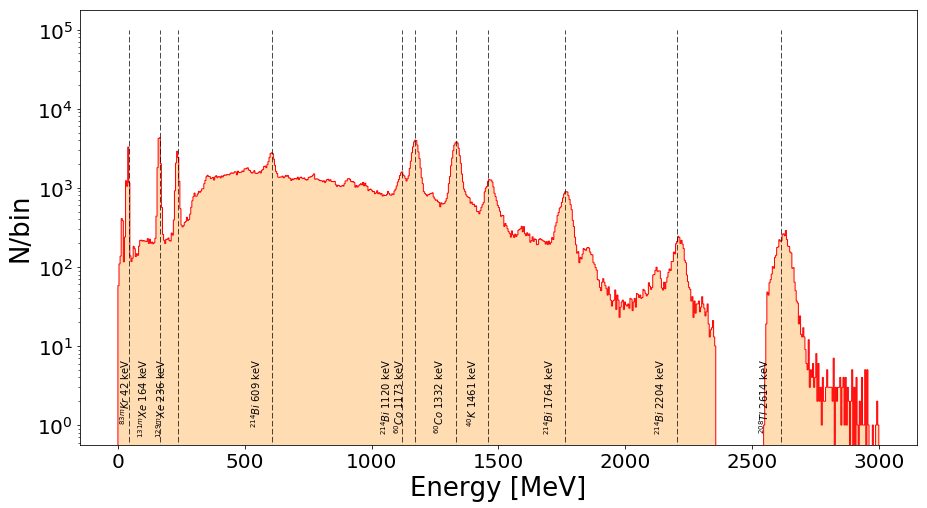

In [6]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.vlines(x=42, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2, 0.5e1, '$^{83m}Kr$ 42 keV', rotation=90, size=10)

plt.vlines(x=164, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(73, 0.5e1, '$^{131m}Xe$ 164 keV', rotation=90, size=10)

plt.vlines(x=236, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(145, 0.5e1, '$^{129m}Xe$ 236 keV', rotation=90, size=10)

plt.vlines(x=609, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(518, 0.5e1, '$^{214}Bi$ 609 keV', rotation=90, size=10)

plt.vlines(x=1120, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1029, 0.5e1, '$^{214}Bi$ 1120 keV', rotation=90, size=10)

plt.vlines(x=1173, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1081, 0.5e1, '$^{60}Co$ 1173 keV', rotation=90, size=10)

plt.vlines(x=1332, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1240, 0.5e1, '$^{60}Co$ 1332 keV', rotation=90, size=10)

plt.vlines(x=1461, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1369, 0.5e1, '$^{40}K$ 1461 keV', rotation=90, size=10)

plt.vlines(x=1764, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1672, 0.5e1, '$^{214}Bi$ 1764 keV', rotation=90, size=10)

plt.vlines(x=2204, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2112, 0.5e1, '$^{214}Bi$ 2204 keV', rotation=90, size=10)

#plt.vlines(x=2448, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(2456, 0.5e1, '$^{214}Bi$ 2448 keV', rotation=90, size=10)

plt.vlines(x=2614, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2522, 0.5e1, '$^{208}Tl$ 2614 keV', rotation=90, size=10)

plt.tick_params(labelsize=20)

In [7]:
energy_peak = np.array([42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]) #keV
resolution = np.array([0.0516, 0.0260, 0.0223, 0.0137, 0.0117, 0.0109, 0.0103, 0.0091, 0.0092, 0.0081, 0.0081])
sigma_peak = energy_peak*resolution
energy_peak_lower = energy_peak-sigma_peak
energy_peak_higher = energy_peak+sigma_peak

In [8]:
#83 Kr
gamma42 = data_1[(data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42 = (data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])
#131m Xe 
gamma164 = data_1[(data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])]
cut_gamma164 = (data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])
#129m Xe
gamma236 = data_1[(data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])]
cut_gamma236 = (data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])
#214 Bi
gamma609 = data_1[(data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])]
cut_gamma609 = (data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])
#214 Bi
gamma1120 = data_1[(data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])]
cut_gamma1120 = (data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])
#60 Co
gamma1173 = data_1[(data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])]
cut_gamma1173 = (data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])
#60 Co
gamma1332 = data_1[(data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332 = (data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])
#40 K
gamma1461 = data_1[(data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])]
cut_gamma1461 = (data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])
#214 Bi
gamma1764 = data_1[(data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])]
cut_gamma1764 = (data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])
#214 Bi 
gamma2204 = data_1[(data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204 = (data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614 = data_1[(data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614 = (data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])

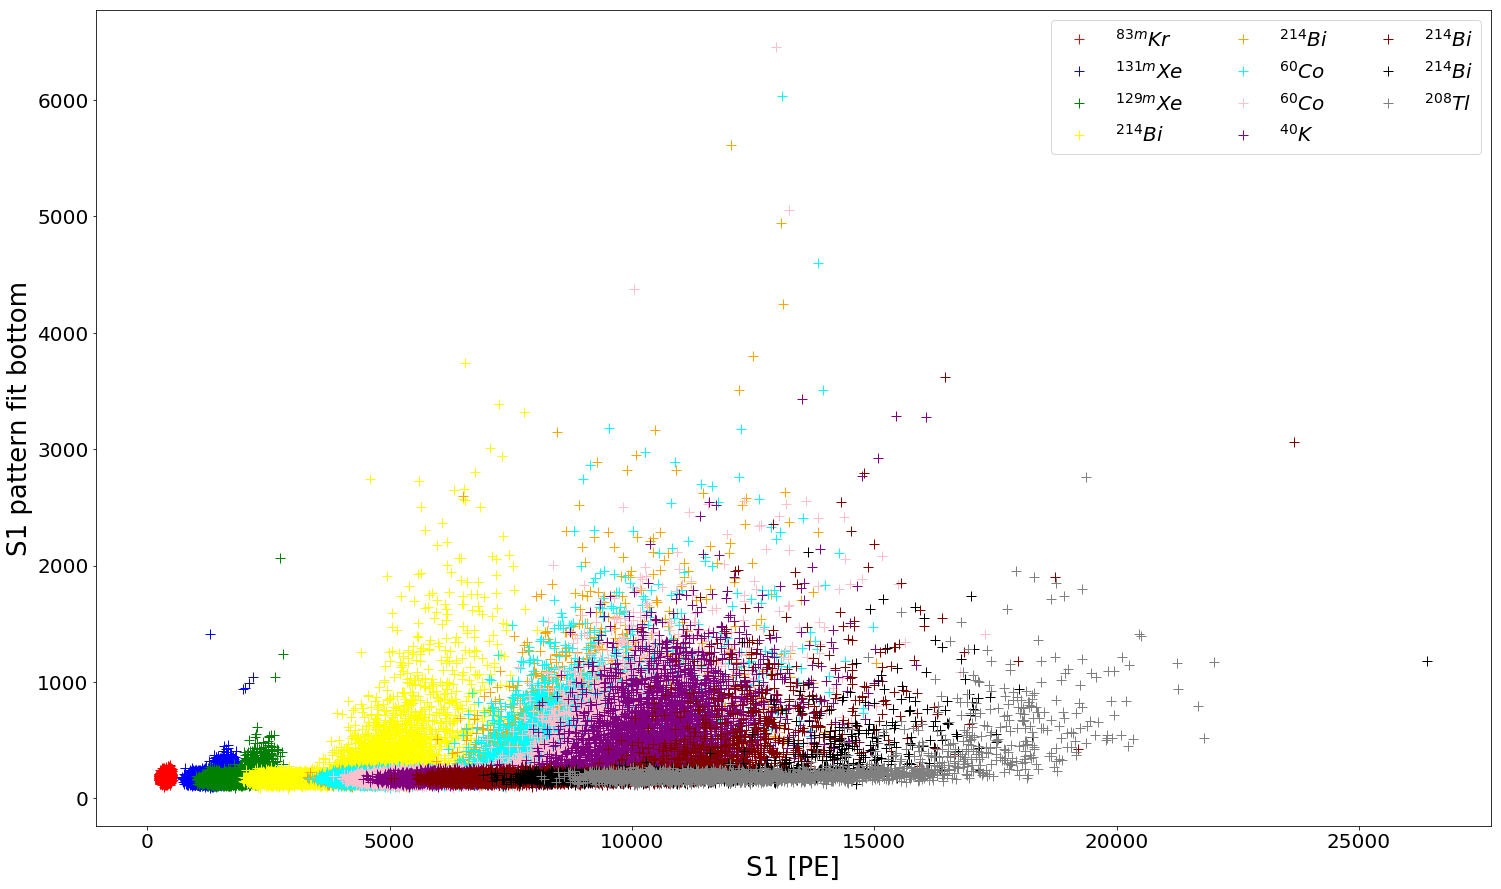

In [9]:
plt.figure(figsize=(25,15))

plt.plot(gamma42['s1'], gamma42['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='$^{83m}Kr$')
plt.plot(gamma164['s1'], gamma164['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='$^{131m}Xe$')
plt.plot(gamma236['s1'], gamma236['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma609['s1'], gamma609['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma1120['s1'], gamma1120['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='orange', label='$^{214}Bi$')
plt.plot(gamma1173['s1'], gamma1173['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1332['s1'], gamma1332['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1461['s1'], gamma1461['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='purple', label='$^{40}K$')
plt.plot(gamma1764['s1'], gamma1764['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma2204['s1'], gamma2204['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='black', label='$^{214}Bi$')
plt.plot(gamma2614['s1'], gamma2614['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='grey', label='$^{208}Tl$')

plt.legend(loc=0, ncol=3, fontsize = 20)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

# gamma42, gamma164, gamma236, gamma609, gamma1120, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
data_gamma = pd.concat([gamma42, gamma164, gamma236, gamma609, gamma1120, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614])

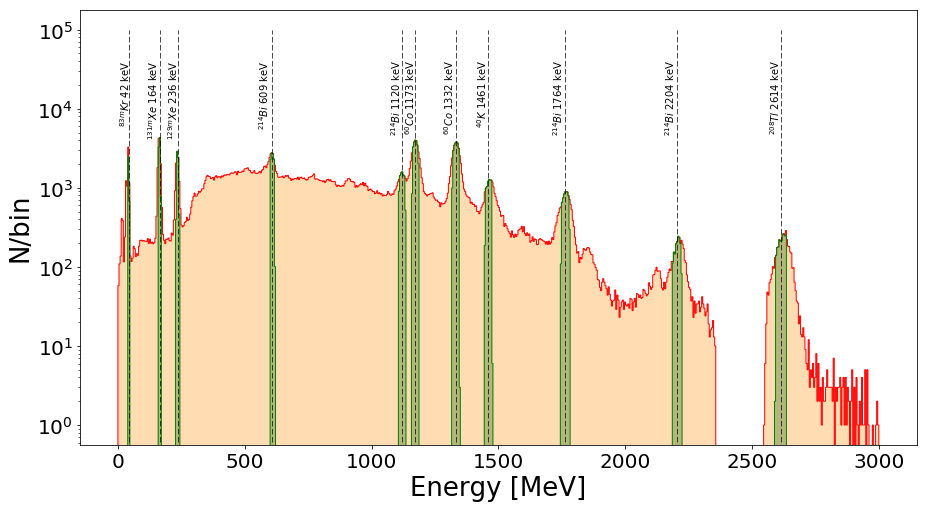

In [10]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3)
plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.vlines(x=42, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(0, 3e4, '$^{83m}Kr$ 42 keV', rotation=90, size=10)

plt.vlines(x=164, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(110, 3e4, '$^{131m}Xe$ 164 keV', rotation=90, size=10)

plt.vlines(x=236, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(190, 3e4, '$^{129m}Xe$ 236 keV', rotation=90, size=10)

plt.vlines(x=609, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(550, 3e4, '$^{214}Bi$ 609 keV', rotation=90, size=10)

plt.vlines(x=1120, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1070, 3e4, '$^{214}Bi$ 1120 keV', rotation=90, size=10)

plt.vlines(x=1173, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1125, 3e4, '$^{60}Co$ 1173 keV', rotation=90, size=10)

plt.vlines(x=1332, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1280, 3e4, '$^{60}Co$ 1332 keV', rotation=90, size=10)

plt.vlines(x=1461, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1410, 3e4, '$^{40}K$ 1461 keV', rotation=90, size=10)

plt.vlines(x=1764, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1710, 3e4, '$^{214}Bi$ 1764 keV', rotation=90, size=10)

plt.vlines(x=2204, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2150, 3e4, '$^{214}Bi$ 2204 keV', rotation=90, size=10)

#plt.vlines(x=2448, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(2456, 3e4, '$^{214}Bi$ 2448 keV', rotation=90, size=10)

plt.vlines(x=2614, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2565, 3e4, '$^{208}Tl$ 2614 keV', rotation=90, size=10)

plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


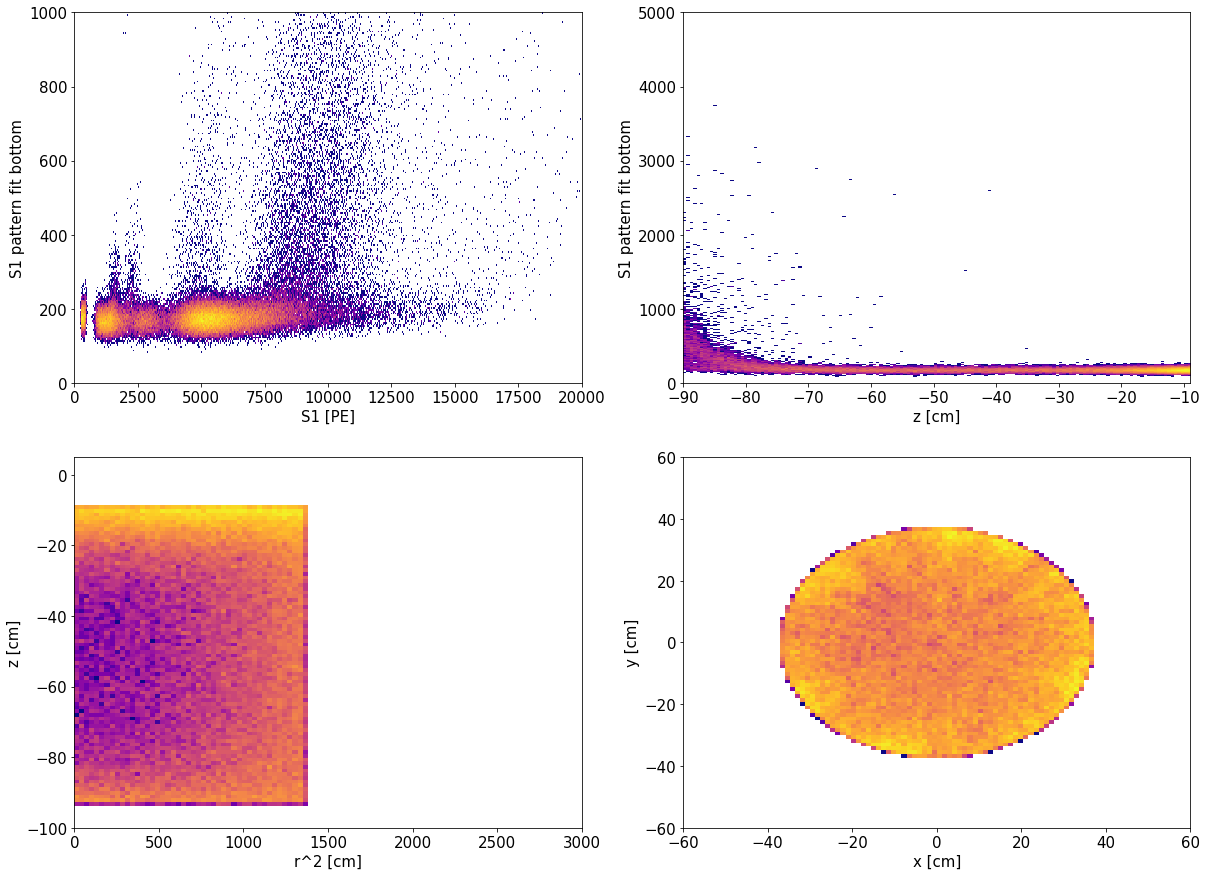

In [11]:
plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.hist2d(data_gamma['s1'], 
           data_gamma['s1_pattern_fit_bottom_hax'], 
           bins = (700, 200), 
           range=((0,2e4), (0,1000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(222)
plt.hist2d(data_gamma['z_3d_nn_tf'], 
           data_gamma['s1_pattern_fit_bottom_hax'], 
           bins = (150, 800), 
           range=((-90, -9), (0, 5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(223)
plt.hist2d(data_gamma['r_3d_nn_tf']**2, 
           data_gamma['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('r^2 [cm]', fontsize=15)
plt.ylabel('z [cm]', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(224)
plt.hist2d(data_gamma['x_3d_nn_tf'], 
           data_gamma['y_3d_nn_tf'], 
           bins = (100, 100), 
           range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('x [cm]', fontsize=15)
plt.ylabel('y [cm]', fontsize=15)
plt.tick_params(labelsize=15)


##### Selezionati i foto picchi, i dati vengono tagliati con S1PL cut extended version. _cut_ è il campione dei dati 'buoni' secondo il mio cut, _BAD_ è il campione di eventi che non passano il cut

##### Nel data set dei foto picchi tagliati (data_gamma) viene definito un taglio sulla percentuale. I dati dentro il corrsispondente valore di S1PL relativo alla percentuale sono usati per calcolare l'acceptance, i dati fuori per la rejection power.

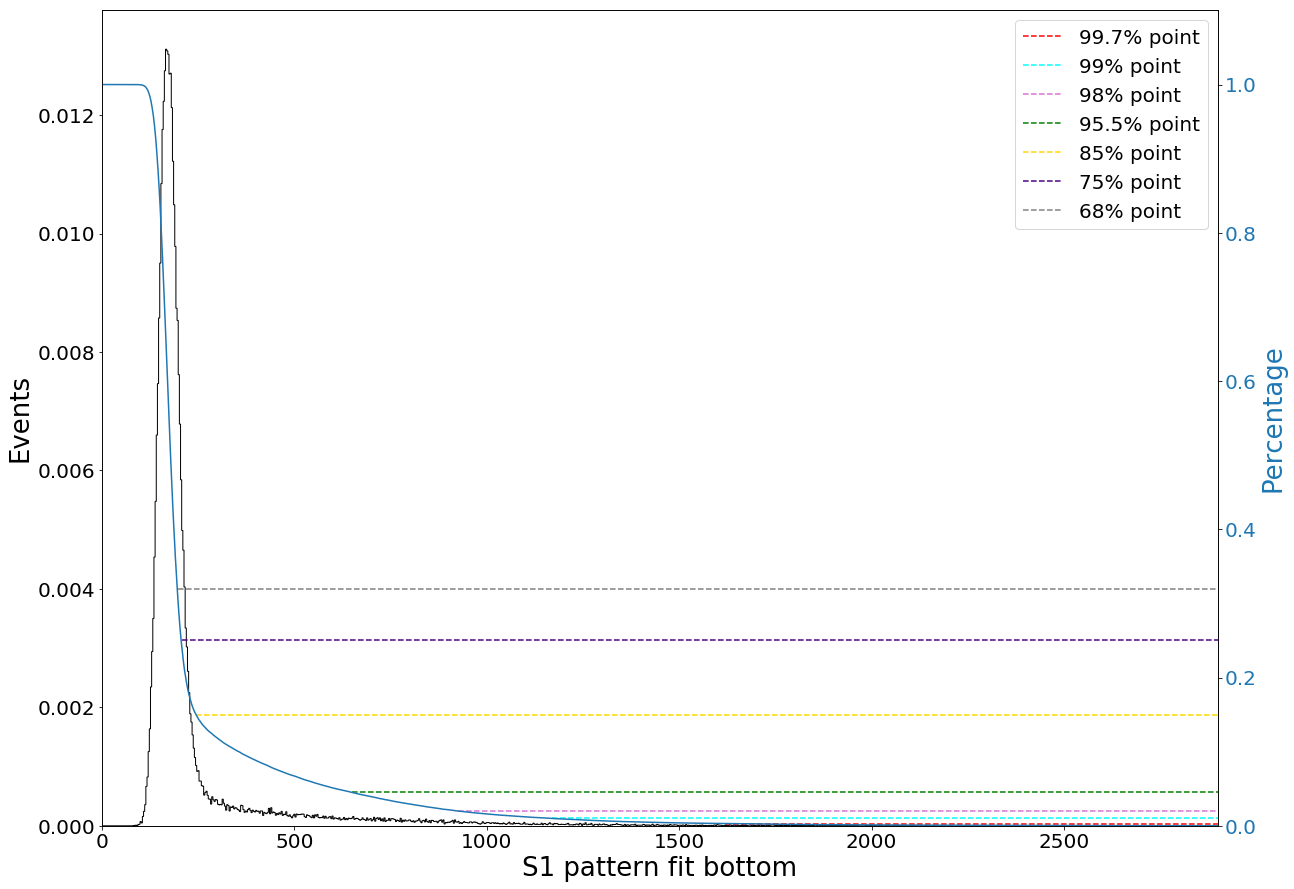

In [12]:
plt.figure(figsize=(20,15))

#########################################################################################
ax1 = plt.subplot()
x_bin=np.linspace(0,3e3, 1000)
x_center = [0.5*(x_bin[i]+x_bin[i+1]) for i in range(len(x_bin)-1)]
color = 'black'
ax1.set_xlabel('S1 pattern fit bottom', fontsize=26)
ax1.set_ylabel('Events', color=color,  fontsize=26)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
hist, xbins, _ = ax1.hist(data_gamma['s1_pattern_fit_bottom_hax'], bins=x_bin, color=color, 
                          label='Cumulative distribution', histtype='step', normed=True)

ax1.set_xlim(0, 2.9e3)
#ax1.set_yscale('log')
#########################################################################################

#########################################################################################
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Percentage', color=color, fontsize=26)
res =  1. - np.cumsum(hist)/np.sum(hist)
ax2.plot(x_center, res, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2.set_xlim(0, 2.9e3)
ax2.set_ylim(bottom=0, top=1.1)
#########################################################################################

idx_1 = get_first_index_nb(res, 0.003) #99.7%
idx_7 = get_first_index_nb(res, 0.01)  #99% #####
idx_6 = get_first_index_nb(res, 0.02)  #98% #####
idx_2 = get_first_index_nb(res, 0.045) #95.5%
idx_3 = get_first_index_nb(res, 0.15)  #85%
idx_4 = get_first_index_nb(res, 0.25)  #75%
idx_5 = get_first_index_nb(res, 0.32)  #68%

#ax1.vlines(x=x_center[idx_1], ymin=0, ymax=420, colors='red', linestyles='dashed', label='')
ax2.hlines(y=0.003, xmin=x_center[idx_1], xmax=3e3, colors='red', linestyles='dashed', label='99.7% point')

ax2.hlines(y=0.01, xmin=x_center[idx_7], xmax=3e3, colors='cyan', linestyles='dashed', label='99% point') #####
ax2.hlines(y=0.02, xmin=x_center[idx_6], xmax=3e3, colors='orchid', linestyles='dashed', label='98% point') #####

#ax1.vlines(x=x_center[idx_2], ymin=0, ymax=310, colors='green', linestyles='dashed', label='')
ax2.hlines(y=0.045, xmin=x_center[idx_2], xmax=3e3, colors='green', linestyles='dashed', label='95.5% point')

#ax1.vlines(x=x_center[idx_3], ymin=0, ymax=135, colors='grey', linestyles='dashed', label='')
ax2.hlines(y=0.15, xmin=x_center[idx_3], xmax=3e3, colors='gold', linestyles='dashed', label='85% point')

#ax1.vlines(x=x_center[idx_1], ymin=0, ymax=420, colors='red', linestyles='dashed', label='')
ax2.hlines(y=0.25, xmin=x_center[idx_4], xmax=3e3, colors='indigo', linestyles='dashed', label='75% point')

#ax1.vlines(x=x_center[idx_3], ymin=0, ymax=135, colors='grey', linestyles='dashed', label='')
ax2.hlines(y=0.32, xmin=x_center[idx_5], xmax=3e3, colors='grey', linestyles='dashed', label='68% point')

ax2.legend(loc=0, fontsize=20)

In [13]:
Cut_for_rejection_1 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_1] #99.7%
Cut_for_rejection_7 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_7] #99% #######
Cut_for_rejection_6 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_6] #98% #######
Cut_for_rejection_2 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_2] #95.5%
Cut_for_rejection_3 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_3] #85%
Cut_for_rejection_4 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_4] #75%
Cut_for_rejection_5 = data_gamma['s1_pattern_fit_bottom_hax']<x_center[idx_5] #68%


data_gamma['ForRejection_1'] = Cut_for_rejection_1 #99.7%
data_gamma['ForRejection_7'] = Cut_for_rejection_7 #98%
data_gamma['ForRejection_6'] = Cut_for_rejection_6 #98%
data_gamma['ForRejection_2'] = Cut_for_rejection_2 #95.5%
data_gamma['ForRejection_3'] = Cut_for_rejection_3 #85%
data_gamma['ForRejection_4'] = Cut_for_rejection_4 #75%
data_gamma['ForRejection_5'] = Cut_for_rejection_5 #68%

print('\n')
data_acceptance_1 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_1'] == True)     #99.7%
data_rejection_BAD_1 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_1'] == False) #99.7%
print('\n')
data_acceptance_7 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_7'] == True)     #99%
data_rejection_BAD_7 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_7'] == False) #99%
print('\n')
data_acceptance_6 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_6'] == True)     #98%
data_rejection_BAD_6 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_6'] == False) #98%
print('\n')
data_acceptance_2 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_2'] == True)     #95.5%
data_rejection_BAD_2 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_2'] == False) #95.5%
print('\n')
data_acceptance_3 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_3'] == True)     #85%
data_rejection_BAD_3 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_3'] == False) #85%
print('\n')
data_acceptance_4 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_4'] == True)     #75%
data_rejection_BAD_4 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_4'] == False) #75%
print('\n')
data_acceptance_5 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_5'] == True)     #68%
data_rejection_BAD_5 = hax.cuts.selection(data_gamma, data_gamma['ForRejection_5'] == False) #68%



Unnamed selection: 315 rows removed (99.68% passed)
Unnamed selection: 96716 rows removed (0.32% passed)


Unnamed selection: 991 rows removed (98.98% passed)
Unnamed selection: 96040 rows removed (1.02% passed)


Unnamed selection: 1957 rows removed (97.98% passed)
Unnamed selection: 95074 rows removed (2.02% passed)




/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 4411 rows removed (95.45% passed)
Unnamed selection: 92620 rows removed (4.55% passed)


Unnamed selection: 14675 rows removed (84.88% passed)
Unnamed selection: 82356 rows removed (15.12% passed)


Unnamed selection: 23571 rows removed (75.71% passed)
Unnamed selection: 73460 rows removed (24.29% passed)


Unnamed selection: 31405 rows removed (67.63% passed)
Unnamed selection: 65626 rows removed (32.37% passed)


(0, 5000)

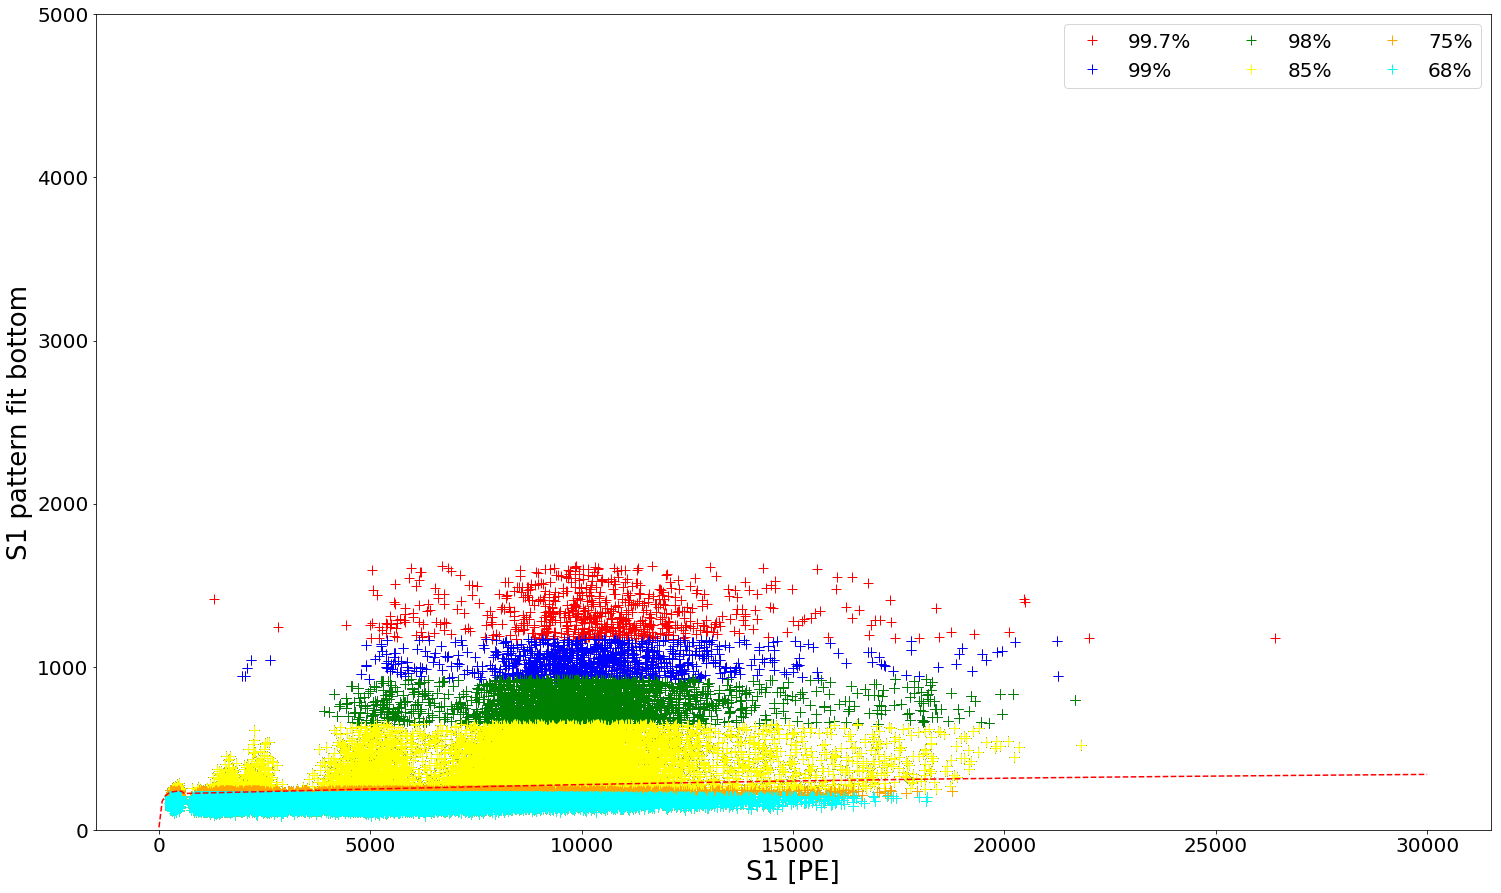

In [14]:
plt.figure(figsize=(25,15))

plt.plot(data_acceptance_1['s1'], data_acceptance_1['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='99.7%')
plt.plot(data_acceptance_7['s1'], data_acceptance_7['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='99%')
plt.plot(data_acceptance_6['s1'], data_acceptance_6['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='98%')
plt.plot(data_acceptance_2['s1'], data_acceptance_2['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='85%')
plt.plot(data_acceptance_3['s1'], data_acceptance_3['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='orange', label='75%')
plt.plot(data_acceptance_4['s1'], data_acceptance_4['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='68%')

y_ = []
x_ = np.linspace(0,3e4, 400)
for i in range(len(x_)):
    y_.append((S1PatternLikelihoodProfile_1(x_[i], *popt_1))*(x_[i]<600) + \
                 (S1arctan(x_[i], *popt_2))*(x_[i]>=600))
plt.plot(x_, y_, 'r--',)
plt.legend(loc=0, ncol=3, fontsize = 20)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.ylim(0,5000)

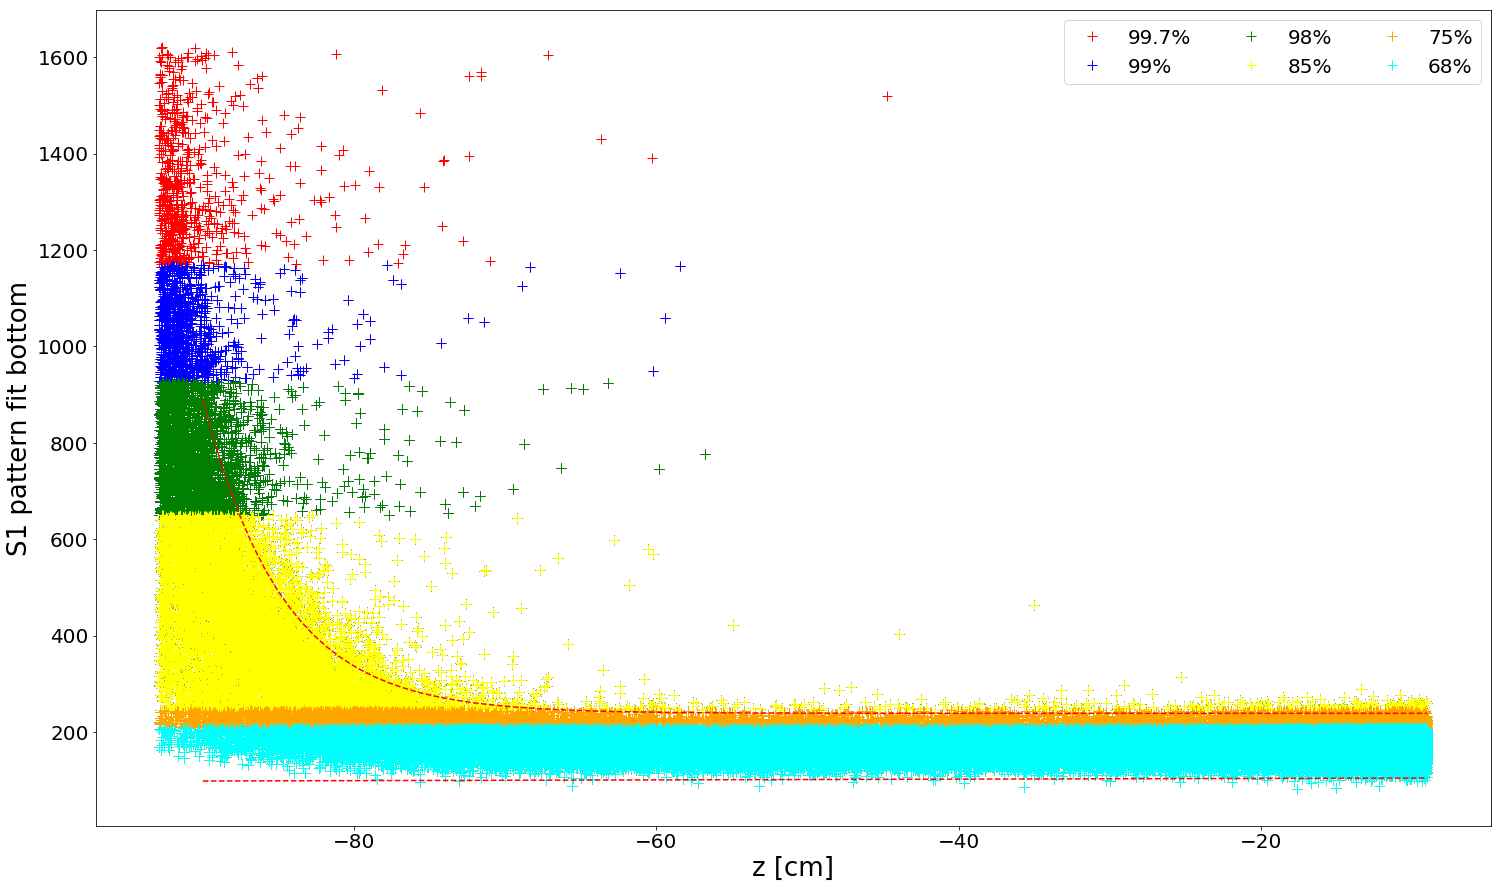

In [15]:
plt.figure(figsize=(25,15))

plt.plot(data_acceptance_1['z_3d_nn_tf'], data_acceptance_1['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='99.7%')
plt.plot(data_acceptance_7['z_3d_nn_tf'], data_acceptance_7['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='99%')
plt.plot(data_acceptance_6['z_3d_nn_tf'], data_acceptance_6['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='98%')
plt.plot(data_acceptance_2['z_3d_nn_tf'], data_acceptance_2['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='85%')
plt.plot(data_acceptance_3['z_3d_nn_tf'], data_acceptance_3['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='orange', label='75%')
plt.plot(data_acceptance_4['z_3d_nn_tf'], data_acceptance_4['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='68%')

y_h = []
y_l = []
xbins_center_z = np.linspace(-90,-9,100)
for i in range(len(xbins_center_z)):
    y_h.append(exp(xbins_center_z[i], *popt_z_high))
    y_l.append(poly1(xbins_center_z[i], *popt_z_low))
plt.plot(xbins_center_z, y_h, 'r--')
plt.plot(xbins_center_z, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.legend(loc=0, ncol=3, fontsize = 20)


(0, 4000)

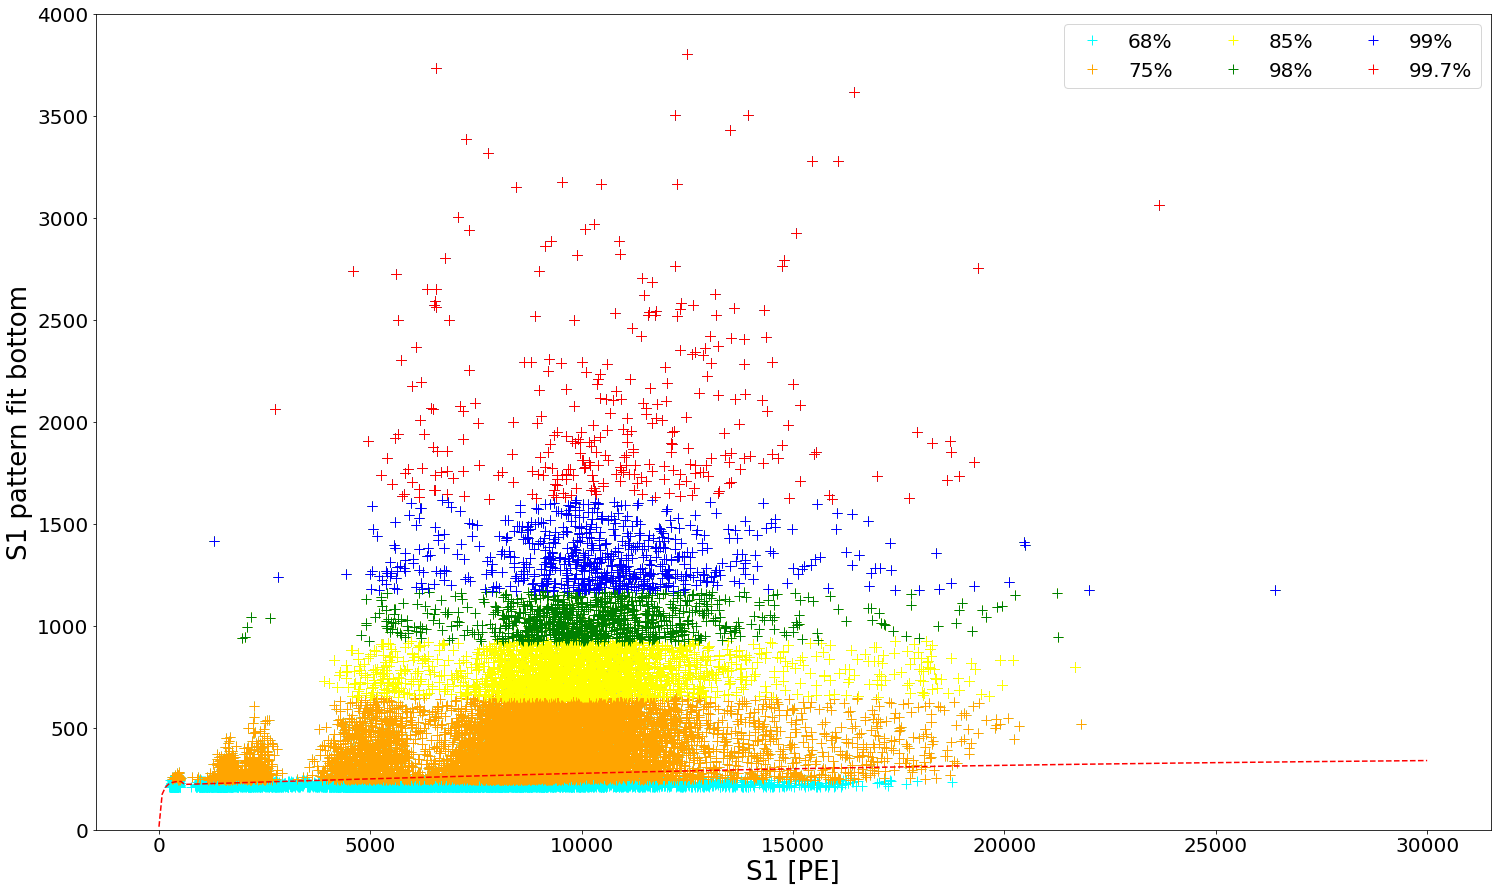

In [16]:
plt.figure(figsize=(25,15))

plt.plot(data_rejection_BAD_4['s1'], data_rejection_BAD_4['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='68%')
plt.plot(data_rejection_BAD_3['s1'], data_rejection_BAD_3['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='orange', label='75%')
plt.plot(data_rejection_BAD_2['s1'], data_rejection_BAD_2['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='85%')
plt.plot(data_rejection_BAD_6['s1'], data_rejection_BAD_6['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='98%')
plt.plot(data_rejection_BAD_7['s1'], data_rejection_BAD_7['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='99%')
plt.plot(data_rejection_BAD_1['s1'], data_rejection_BAD_1['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='99.7%')

y_ = []
x_ = np.linspace(0,3e4, 400)
for i in range(len(x_)):
    y_.append((S1PatternLikelihoodProfile_1(x_[i], *popt_1))*(x_[i]<600) + \
                 (S1arctan(x_[i], *popt_2))*(x_[i]>=600))
plt.plot(x_, y_, 'r--',)
plt.legend(loc=0, ncol=3, fontsize = 20)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.ylim(0,4000)

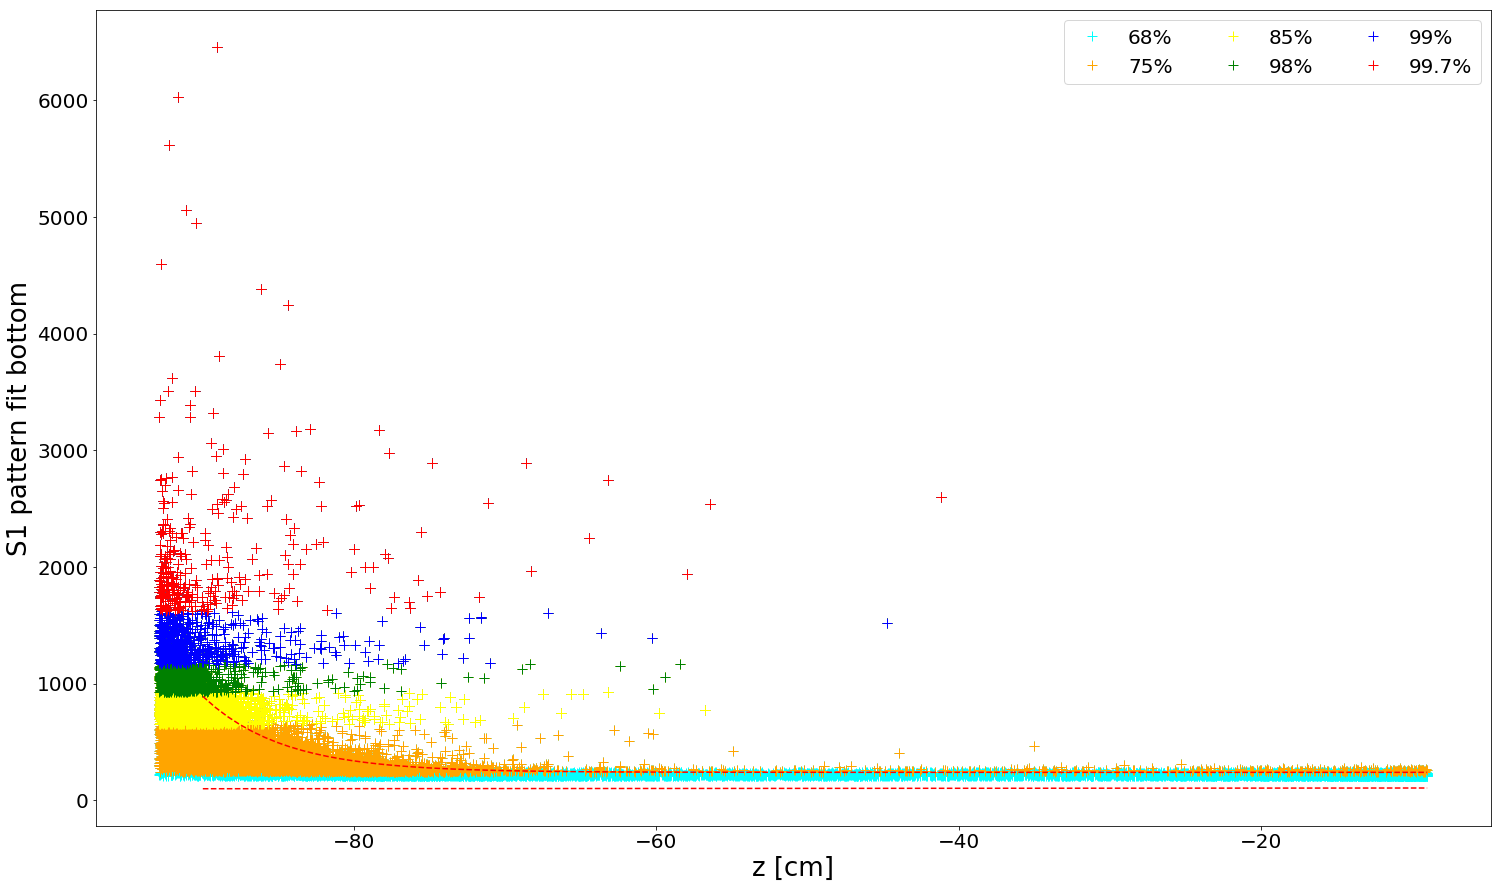

In [17]:
plt.figure(figsize=(25,15))

plt.plot(data_rejection_BAD_4['z_3d_nn_tf'], data_rejection_BAD_4['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='68%')
plt.plot(data_rejection_BAD_3['z_3d_nn_tf'], data_rejection_BAD_3['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='orange', label='75%')
plt.plot(data_rejection_BAD_2['z_3d_nn_tf'], data_rejection_BAD_2['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='85%')
plt.plot(data_rejection_BAD_6['z_3d_nn_tf'], data_rejection_BAD_6['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='98%')
plt.plot(data_rejection_BAD_7['z_3d_nn_tf'], data_rejection_BAD_7['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='99%')
plt.plot(data_rejection_BAD_1['z_3d_nn_tf'], data_rejection_BAD_1['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='99.7%')


y_h = []
y_l = []
xbins_center_z = np.linspace(-90,-9,100)
for i in range(len(xbins_center_z)):
    y_h.append(exp(xbins_center_z[i], *popt_z_high))
    y_l.append(poly1(xbins_center_z[i], *popt_z_low))
plt.plot(xbins_center_z, y_h, 'r--')
plt.plot(xbins_center_z, y_l, 'r--')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.legend(loc=0, ncol=3, fontsize = 20)


### Acceptance
#### Consideriamo i dati al di sotto di 99.5%, 99%, 99.9% S1PL di data_gamma. Questi sono presi come dati buoni su cui calcolare l'accettanza. Applichiamo il tagli S1PL e viediamo quanti ne passano.

- 99.7%

In [18]:
s1PL = data_acceptance_1['s1_pattern_fit_bottom_hax']
z = data_acceptance_1['z_3d_nn_tf']
s1 = data_acceptance_1['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_1['CutS1PL'] = cut

data_acceptance_1_cut = hax.cuts.selection(data_acceptance_1, data_acceptance_1['CutS1PL'] == True) 
data_acceptance_1_BAD = hax.cuts.selection(data_acceptance_1, data_acceptance_1['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

Unnamed selection: 13698 rows removed (85.84% passed)
Unnamed selection: 83018 rows removed (14.16% passed)


- 99%

In [19]:
s1PL = data_acceptance_7['s1_pattern_fit_bottom_hax']
z = data_acceptance_7['z_3d_nn_tf']
s1 = data_acceptance_7['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_7['CutS1PL'] = cut

data_acceptance_7_cut = hax.cuts.selection(data_acceptance_7, data_acceptance_7['CutS1PL'] == True) 
data_acceptance_7_BAD = hax.cuts.selection(data_acceptance_7, data_acceptance_7['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

Unnamed selection: 13022 rows removed (86.44% passed)
Unnamed selection: 83018 rows removed (13.56% passed)


- 98%

In [20]:
s1PL = data_acceptance_6['s1_pattern_fit_bottom_hax']
z = data_acceptance_6['z_3d_nn_tf']
s1 = data_acceptance_6['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_6['CutS1PL'] = cut

data_acceptance_6_cut = hax.cuts.selection(data_acceptance_6, data_acceptance_6['CutS1PL'] == True) 
data_acceptance_6_BAD = hax.cuts.selection(data_acceptance_6, data_acceptance_6['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

Unnamed selection: 12056 rows removed (87.32% passed)
Unnamed selection: 83018 rows removed (12.68% passed)


- 98%

In [21]:
s1PL = data_acceptance_2['s1_pattern_fit_bottom_hax']
z = data_acceptance_2['z_3d_nn_tf']
s1 = data_acceptance_2['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_2['CutS1PL'] = cut

data_acceptance_2_cut = hax.cuts.selection(data_acceptance_2, data_acceptance_2['CutS1PL'] == True) 
data_acceptance_2_BAD = hax.cuts.selection(data_acceptance_2, data_acceptance_2['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

Unnamed selection: 9602 rows removed (89.63% passed)
Unnamed selection: 83018 rows removed (10.37% passed)


- 85%

In [22]:
s1PL = data_acceptance_3['s1_pattern_fit_bottom_hax']
z = data_acceptance_3['z_3d_nn_tf']
s1 = data_acceptance_3['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_3['CutS1PL'] = cut

data_acceptance_3_cut = hax.cuts.selection(data_acceptance_3, data_acceptance_3['CutS1PL'] == True) 
data_acceptance_3_BAD = hax.cuts.selection(data_acceptance_3, data_acceptance_3['CutS1PL'] == False)

Unnamed selection: 542 rows removed (99.34% passed)
Unnamed selection: 81814 rows removed (0.66% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 75%

In [23]:
s1PL = data_acceptance_4['s1_pattern_fit_bottom_hax']
z = data_acceptance_4['z_3d_nn_tf']
s1 = data_acceptance_4['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_4['CutS1PL'] = cut

data_acceptance_4_cut = hax.cuts.selection(data_acceptance_4, data_acceptance_4['CutS1PL'] == True) 
data_acceptance_4_BAD = hax.cuts.selection(data_acceptance_4, data_acceptance_4['CutS1PL'] == False)

Unnamed selection: 42 rows removed (99.94% passed)
Unnamed selection: 73418 rows removed (0.06% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 68%

In [24]:
s1PL = data_acceptance_5['s1_pattern_fit_bottom_hax']
z = data_acceptance_5['z_3d_nn_tf']
s1 = data_acceptance_5['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_acceptance_5['CutS1PL'] = cut

data_acceptance_5_cut = hax.cuts.selection(data_acceptance_5, data_acceptance_5['CutS1PL'] == True) 
data_acceptance_5_BAD = hax.cuts.selection(data_acceptance_5, data_acceptance_5['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Unnamed selection: 42 rows removed (99.94% passed)
Unnamed selection: 65584 rows removed (0.06% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


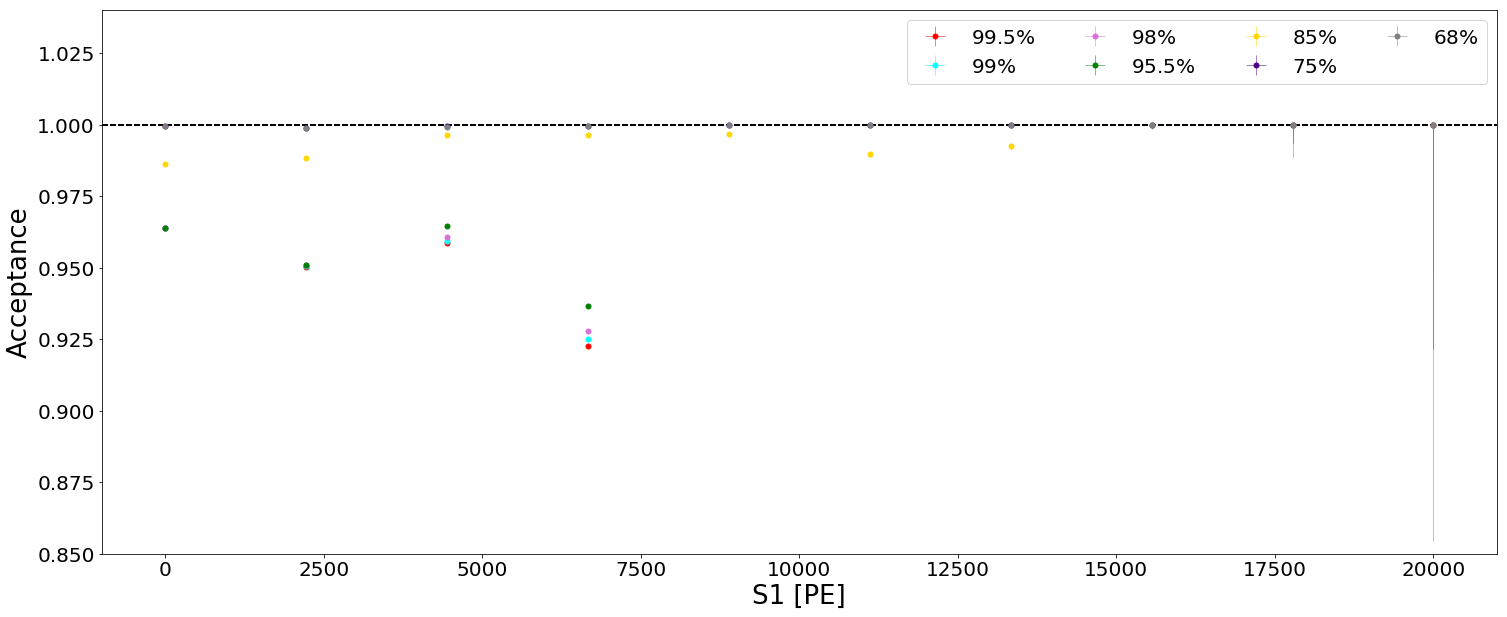

In [25]:
plt.figure(figsize=(25,10))

Bins=10
hist_range=([0, 2e4])  
binn=np.linspace(0,2e4,Bins)
acceptance(data_acceptance_1.s1, data_acceptance_1_cut.s1, label= '$99.5\%$', color='red', markersize=10)
acceptance(data_acceptance_7.s1, data_acceptance_7_cut.s1, label= '$99\%$', color='cyan', markersize=10)
acceptance(data_acceptance_6.s1, data_acceptance_6_cut.s1, label= '$98\%$', color='orchid', markersize=10)
acceptance(data_acceptance_2.s1, data_acceptance_2_cut.s1, label= '$95.5\%$', color='green', markersize=10)
acceptance(data_acceptance_3.s1, data_acceptance_3_cut.s1, label= '$85\%$', color='gold', markersize=10)
acceptance(data_acceptance_4.s1, data_acceptance_4_cut.s1, label= '$75\%$', color='indigo', markersize=10)
acceptance(data_acceptance_5.s1, data_acceptance_5_cut.s1, label= '$68\%$', color='grey', markersize=10)
#plt.ylim(0.85, 1.01)
plt.ylabel('Acceptance', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best', fontsize=20, ncol=4)
plt.ylim(0.85,1.04)
plt.tick_params(labelsize=20)


In [26]:
#83 Kr
gamma42 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_1_cut[(data_acceptance_1['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_1[(data_acceptance_1['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_1['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_1_cut[(data_acceptance_1_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_1_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_1 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_1 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [27]:
#83 Kr
gamma42 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_7_cut[(data_acceptance_7['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_7[(data_acceptance_7['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_7['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_7_cut[(data_acceptance_7_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_7_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_7 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_7 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [28]:
#83 Kr
gamma42 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_6_cut[(data_acceptance_6['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_6[(data_acceptance_6['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_6['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_6_cut[(data_acceptance_6_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_6_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_6 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_6 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [29]:
#83 Kr
gamma42 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_2_cut[(data_acceptance_2['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_2[(data_acceptance_2['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_2['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_2_cut[(data_acceptance_2_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_2_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_2 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_2 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [30]:
#83 Kr
gamma42 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_3_cut[(data_acceptance_3['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_3[(data_acceptance_3['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_3['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_3_cut[(data_acceptance_3_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_3_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_3 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_3 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [31]:
#83 Kr
gamma42 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_4_cut[(data_acceptance_4['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_4[(data_acceptance_4['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_4['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_4_cut[(data_acceptance_4_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_4_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_4 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_4 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [32]:
#83 Kr
gamma42 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[0])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[1])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[2])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[3])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[4])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[5])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[6])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_acceptance_5_cut[(data_acceptance_5['CES']/10**3<=energy_peak_higher[7])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[8])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[9])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_acceptance_5[(data_acceptance_5['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_5['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_acceptance_5_cut[(data_acceptance_5_cut['CES']/10**3<=energy_peak_higher[10])&(data_acceptance_5_cut['CES']/10**3>=energy_peak_lower[10])]

Acce_E_5 = [len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_5 = [np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x = [42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


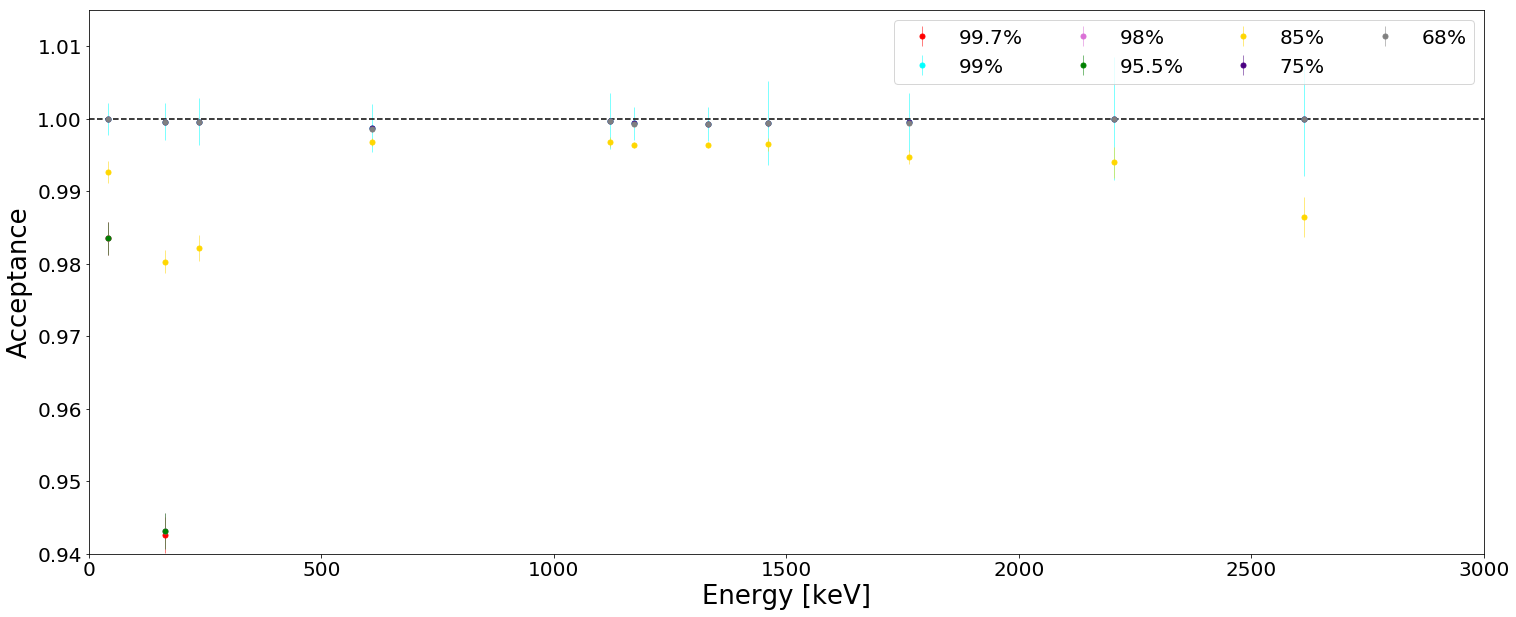

In [33]:
plt.figure(figsize=(25,10))

plt.errorbar(x, Acce_E_1, Sig_E_1, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='red', label='$99.7\%$')
plt.errorbar(x, Acce_E_4, Sig_E_7, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='cyan', label='$99\%$')
plt.errorbar(x, Acce_E_6, Sig_E_6, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='orchid', label='$98\%$')
plt.errorbar(x, Acce_E_2, Sig_E_2, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='green', label='$95.5\%$')
plt.errorbar(x, Acce_E_3, Sig_E_3, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='gold', label='$85\%$')
plt.errorbar(x, Acce_E_4, Sig_E_4, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='indigo', label='$75\%$')
plt.errorbar(x, Acce_E_5, Sig_E_5, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='grey', label='$68\%$')
plt.ylabel('Acceptance', fontsize=26)
plt.xlabel('Energy [keV]', fontsize=26)
plt.legend(loc='best', fontsize=20, ncol=4)
plt.hlines(y=1, xmin=0, xmax=3e3, colors='k', linestyles='dashed')
plt.xlim(0,3e3)
plt.ylim(0.94,1.015)
plt.tick_params(labelsize=20)

In [34]:
np.mean(Acce_E_1), np.mean(Acce_E_7), np.mean(Acce_E_6), np.mean(Acce_E_2), np.mean(Acce_E_3), np.mean(Acce_E_4), np.mean(Acce_E_5)

(0.8626546342673607,
 0.8679479800953288,
 0.8755338415872629,
 0.8962056211314849,
 0.9921185887274967,
 0.9995821758932002,
 0.9995344560392094)

In [35]:
Sig_E_1 = np.asarray(Sig_E_1)
Sig_E_7 = np.asarray(Sig_E_7)
Sig_E_6 = np.asarray(Sig_E_6)
Sig_E_2 = np.asarray(Sig_E_2)
Sig_E_3 = np.asarray(Sig_E_3)
Sig_E_4 = np.asarray(Sig_E_4)
Sig_E_5 = np.asarray(Sig_E_5)

In [36]:
np.sqrt(np.sum(Sig_E_1**2))/len(Sig_E_1), np.sqrt(np.sum(Sig_E_7**2))/len(Sig_E_7), np.sqrt(np.sum(Sig_E_6**2))/len(Sig_E_6), np.sqrt(np.sum(Sig_E_2**2))/len(Sig_E_2), np.sqrt(np.sum(Sig_E_3**2))/len(Sig_E_3), np.sqrt(np.sum(Sig_E_4**2))/len(Sig_E_4), np.sqrt(np.sum(Sig_E_5**2))/len(Sig_E_5)

(0.001427675828261061,
 0.001413457351396707,
 0.0013936462690187165,
 0.0013208704389524816,
 0.0004333898862165058,
 7.315671657171462e-05,
 8.179701563660115e-05)

### Rejection
#### Consideriamo i dati al di sopra di 99.7%, 98%, 68% S1PL di data_gamma. Questi sono presi come dati cattivi su cui calcolare la rejection. Applichiamo il tagli S1PL e viediamo quanti ne passano.

- 99.7%

In [37]:
s1PL = data_rejection_BAD_1['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_1['z_3d_nn_tf']
s1 = data_rejection_BAD_1['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_1['CutS1PL'] = cut

data_rejection_BAD_1_cut = hax.cuts.selection(data_rejection_BAD_1, data_rejection_BAD_1['CutS1PL'] == True) 
data_rejection_BAD_1_BAD = hax.cuts.selection(data_rejection_BAD_1, data_rejection_BAD_1['CutS1PL'] == False)

Unnamed selection: 315 rows removed (0.00% passed)
Unnamed selection: 0 rows removed (100.00% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 99%

In [38]:
s1PL = data_rejection_BAD_7['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_7['z_3d_nn_tf']
s1 = data_rejection_BAD_7['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_7['CutS1PL'] = cut

data_rejection_BAD_7_cut = hax.cuts.selection(data_rejection_BAD_7, data_rejection_BAD_7['CutS1PL'] == True) 
data_rejection_BAD_7_BAD = hax.cuts.selection(data_rejection_BAD_7, data_rejection_BAD_7['CutS1PL'] == False)

Unnamed selection: 991 rows removed (0.00% passed)
Unnamed selection: 0 rows removed (100.00% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 98%

In [39]:
s1PL = data_rejection_BAD_6['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_6['z_3d_nn_tf']
s1 = data_rejection_BAD_6['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_6['CutS1PL'] = cut

data_rejection_BAD_6_cut = hax.cuts.selection(data_rejection_BAD_6, data_rejection_BAD_6['CutS1PL'] == True) 
data_rejection_BAD_6_BAD = hax.cuts.selection(data_rejection_BAD_6, data_rejection_BAD_6['CutS1PL'] == False)

Unnamed selection: 1957 rows removed (0.00% passed)
Unnamed selection: 0 rows removed (100.00% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 95.5%

In [40]:
s1PL = data_rejection_BAD_2['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_2['z_3d_nn_tf']
s1 = data_rejection_BAD_2['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_2['CutS1PL'] = cut

data_rejection_BAD_2_cut = hax.cuts.selection(data_rejection_BAD_2, data_rejection_BAD_2['CutS1PL'] == True) 
data_rejection_BAD_2_BAD = hax.cuts.selection(data_rejection_BAD_2, data_rejection_BAD_2['CutS1PL'] == False)

Unnamed selection: 4411 rows removed (0.00% passed)
Unnamed selection: 0 rows removed (100.00% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribu

- 85%

In [41]:
s1PL = data_rejection_BAD_3['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_3['z_3d_nn_tf']
s1 = data_rejection_BAD_3['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_3['CutS1PL'] = cut

data_rejection_BAD_3_cut = hax.cuts.selection(data_rejection_BAD_3, data_rejection_BAD_3['CutS1PL'] == True) 
data_rejection_BAD_3_BAD = hax.cuts.selection(data_rejection_BAD_3, data_rejection_BAD_3['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Unnamed selection: 13471 rows removed (8.20% passed)
Unnamed selection: 1204 rows removed (91.80% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


- 75%

In [42]:
s1PL = data_rejection_BAD_4['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_4['z_3d_nn_tf']
s1 = data_rejection_BAD_4['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_4['CutS1PL'] = cut

data_rejection_BAD_4_cut = hax.cuts.selection(data_rejection_BAD_4, data_rejection_BAD_4['CutS1PL'] == True) 
data_rejection_BAD_4_BAD = hax.cuts.selection(data_rejection_BAD_4, data_rejection_BAD_4['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed selection: 13971 rows removed (40.73% passed)
Unnamed selection: 9600 rows removed (59.27% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


- 65%

In [43]:
s1PL = data_rejection_BAD_5['s1_pattern_fit_bottom_hax']
z = data_rejection_BAD_5['z_3d_nn_tf']
s1 = data_rejection_BAD_5['s1']

cut_z = (s1PL < exp(z, *popt_z_high))&(s1PL > poly1(z, *popt_z_low))
cut_s1 = (((s1PL < S1PatternLikelihoodProfile_1(s1, *popt_1))*(s1<600))|((s1PL < S1arctan(s1, *popt_2))*(s1>=600)))
cut = cut_z&cut_s1

data_rejection_BAD_5['CutS1PL'] = cut

data_rejection_BAD_5_cut = hax.cuts.selection(data_rejection_BAD_5, data_rejection_BAD_5['CutS1PL'] == True) 
data_rejection_BAD_5_BAD = hax.cuts.selection(data_rejection_BAD_5, data_rejection_BAD_5['CutS1PL'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed selection: 13971 rows removed (55.51% passed)
Unnamed selection: 17434 rows removed (44.49% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning:

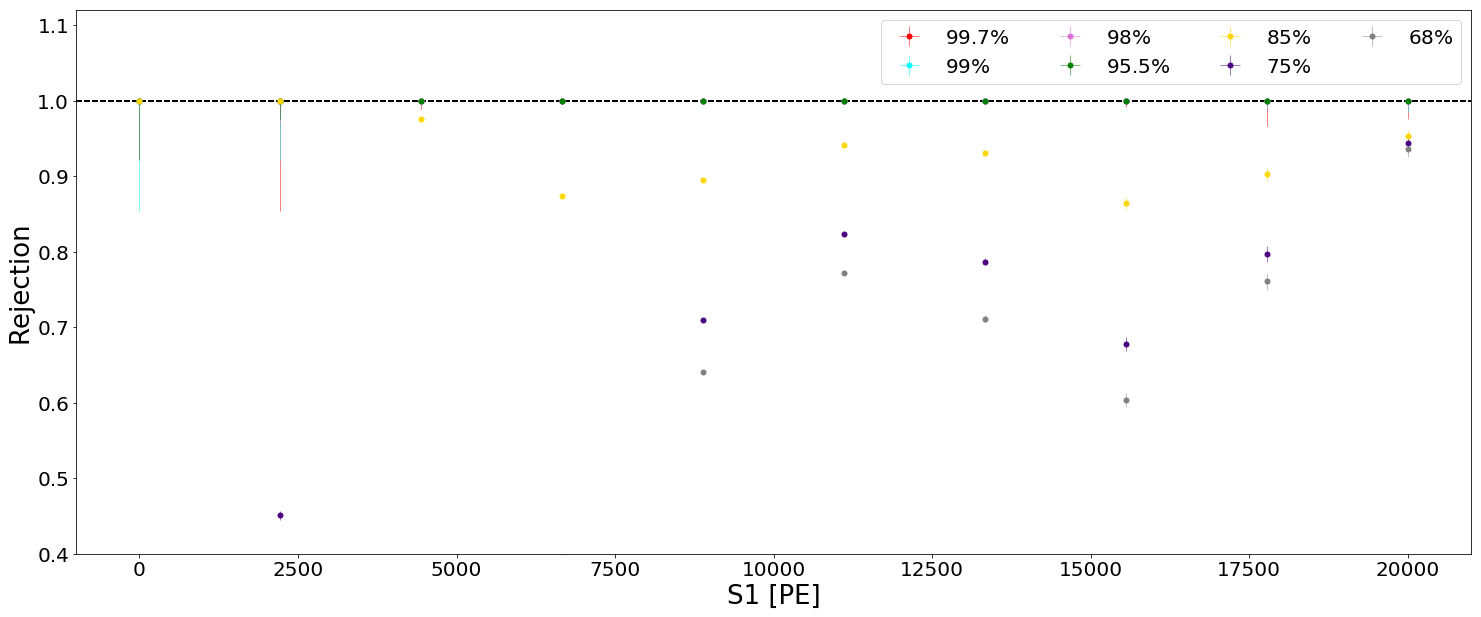

In [44]:
plt.figure(figsize=(25,10))

Bins=10
hist_range=([0, 2e4])  
binn=np.linspace(0,2e4,Bins)
acceptance(data_rejection_BAD_1.s1, data_rejection_BAD_1_BAD.s1, label= '$99.7\%$', color='red', markersize=10)
acceptance(data_rejection_BAD_7.s1, data_rejection_BAD_7_BAD.s1, label= '$99\%$', color='cyan', markersize=10)
acceptance(data_rejection_BAD_6.s1, data_rejection_BAD_6_BAD.s1, label= '$98\%$', color='orchid', markersize=10)
acceptance(data_rejection_BAD_2.s1, data_rejection_BAD_2_BAD.s1, label= '$95.5\%$', color='green', markersize=10)
acceptance(data_rejection_BAD_3.s1, data_rejection_BAD_3_BAD.s1, label= '$85\%$', color='gold', markersize=10)
acceptance(data_rejection_BAD_4.s1, data_rejection_BAD_4_BAD.s1, label= '$75\%$', color='indigo', markersize=10)
acceptance(data_rejection_BAD_5.s1, data_rejection_BAD_5_BAD.s1, label= '$68\%$', color='grey', markersize=10)
plt.ylabel('Rejection', fontsize=26)
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best', fontsize=20, ncol=4)
plt.ylim(0.40,1.12)
plt.tick_params(labelsize=20)

In [45]:
#83 Kr
gamma42 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_1[(data_rejection_BAD_1['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_1['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_1_BAD[(data_rejection_BAD_1_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_1_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_1 = [#len(gamma42_cut)/len(gamma42),
            #len(gamma164_cut)/len(gamma164),
            #len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764)]
            #len(gamma2204_cut)/len(gamma2204),
            #len(gamma2614_cut)/len(gamma2614)]
Sig_E_1 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           #np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           #np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764)))]
           #np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           #np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_1 = [609, 1120, 1173, 1332, 1461, 1764]

In [46]:
#83 Kr
gamma42 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_7[(data_rejection_BAD_7['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_7['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_7_BAD[(data_rejection_BAD_7_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_7_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_7 = [#len(gamma42_cut)/len(gamma42),
            #len(gamma164_cut)/len(gamma164),
            #len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764)]
            #len(gamma2204_cut)/len(gamma2204),
            #len(gamma2614_cut)/len(gamma2614)]
Sig_E_7 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           #np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           #np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764)))]
           #np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           #np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_7 = [609, 1120, 1173, 1332, 1461, 1764]

In [47]:
#83 Kr
gamma42 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_6[(data_rejection_BAD_6['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_6['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_6_BAD[(data_rejection_BAD_6_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_6_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_6 = [#len(gamma42_cut)/len(gamma42),
            #len(gamma164_cut)/len(gamma164),
            #len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_6 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           #np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           #np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_6 = [609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

In [48]:
#83 Kr
gamma42 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_2[(data_rejection_BAD_2['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_2['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_2_BAD[(data_rejection_BAD_2_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_2_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_2 = [#len(gamma42_cut)/len(gamma42),
            #len(gamma164_cut)/len(gamma164),
            #len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_2 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           #np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           #np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_2 = [609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

In [49]:
#83 Kr
gamma42 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_3[(data_rejection_BAD_3['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_3['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_3_BAD[(data_rejection_BAD_3_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_3_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_3 = [#len(gamma42_cut)/len(gamma42),
            #len(gamma164_cut)/len(gamma164),
            #len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_3 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           #np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           #np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_3 = [609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [50]:
#83 Kr
gamma42 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_4[(data_rejection_BAD_4['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_4['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_4_BAD[(data_rejection_BAD_4_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_4_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_4 = [#len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_4 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_4 = [164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [51]:
#83 Kr
gamma42 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[0])]
gamma42_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[0])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[0])]
#131m Xe 
gamma164 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[1])]
gamma164_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[1])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[1])]
#129m Xe
gamma236 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[2])]
gamma236_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[2])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[2])]
#214 Bi
gamma609 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[3])]
gamma609_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[3])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[3])]
#214 Bi
gamma1120 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[4])]
gamma1120_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[4])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[4])]
#60 Co
gamma1173 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[5])]
gamma1173_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[5])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[5])]
#60 Co
gamma1332 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[6])]
gamma1332_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[6])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[6])]
#40 K
gamma1461 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[7])]
gamma1461_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[7])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[7])]
#214 Bi
gamma1764 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[8])]
gamma1764_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[8])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[8])]
#214 Bi 
gamma2204 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[9])]
gamma2204_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[9])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[9])]
#208 Tl 
gamma2614 = data_rejection_BAD_5[(data_rejection_BAD_5['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_5['CES']/10**3>=energy_peak_lower[10])]
gamma2614_cut = data_rejection_BAD_5_BAD[(data_rejection_BAD_5_BAD['CES']/10**3<=energy_peak_higher[10])&(data_rejection_BAD_5_BAD['CES']/10**3>=energy_peak_lower[10])]

Acce_E_5 = [#len(gamma42_cut)/len(gamma42),
            len(gamma164_cut)/len(gamma164),
            len(gamma236_cut)/len(gamma236),
            len(gamma609_cut)/len(gamma609),
            len(gamma1120_cut)/len(gamma1120),
            len(gamma1173_cut)/len(gamma1173),
            len(gamma1332_cut)/len(gamma1332),
            len(gamma1461_cut)/len(gamma1461),
            len(gamma1764_cut)/len(gamma1764),
            len(gamma2204_cut)/len(gamma2204),
            len(gamma2614_cut)/len(gamma2614)]
Sig_E_5 = [#np.sqrt((len(gamma42_cut)/len(gamma42))*(1-(len(gamma42_cut)/len(gamma42)))/(len(gamma42))),
           np.sqrt((len(gamma164_cut)/len(gamma164))*(1-(len(gamma164_cut)/len(gamma164)))/(len(gamma164))),
           np.sqrt((len(gamma236_cut)/len(gamma236))*(1-(len(gamma236_cut)/len(gamma236)))/(len(gamma236))),
           np.sqrt((len(gamma609_cut)/len(gamma609))*(1-(len(gamma609_cut)/len(gamma609)))/(len(gamma609))),
           np.sqrt((len(gamma1120_cut)/len(gamma1120))*(1-(len(gamma1120_cut)/len(gamma1120)))/(len(gamma1120))),
           np.sqrt((len(gamma1173_cut)/len(gamma1173))*(1-(len(gamma1173_cut)/len(gamma1173)))/(len(gamma1173))),
           np.sqrt((len(gamma1332_cut)/len(gamma1332))*(1-(len(gamma1332_cut)/len(gamma1332)))/(len(gamma1332))),
           np.sqrt((len(gamma1461_cut)/len(gamma1461))*(1-(len(gamma1461_cut)/len(gamma1461)))/(len(gamma1461))),
           np.sqrt((len(gamma1764_cut)/len(gamma1764))*(1-(len(gamma1764_cut)/len(gamma1764)))/(len(gamma1764))),
           np.sqrt((len(gamma2204_cut)/len(gamma2204))*(1-(len(gamma2204_cut)/len(gamma2204)))/(len(gamma2204))),
           np.sqrt((len(gamma2614_cut)/len(gamma2614))*(1-(len(gamma2614_cut)/len(gamma2614)))/(len(gamma2614)))]
x_5 = [164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


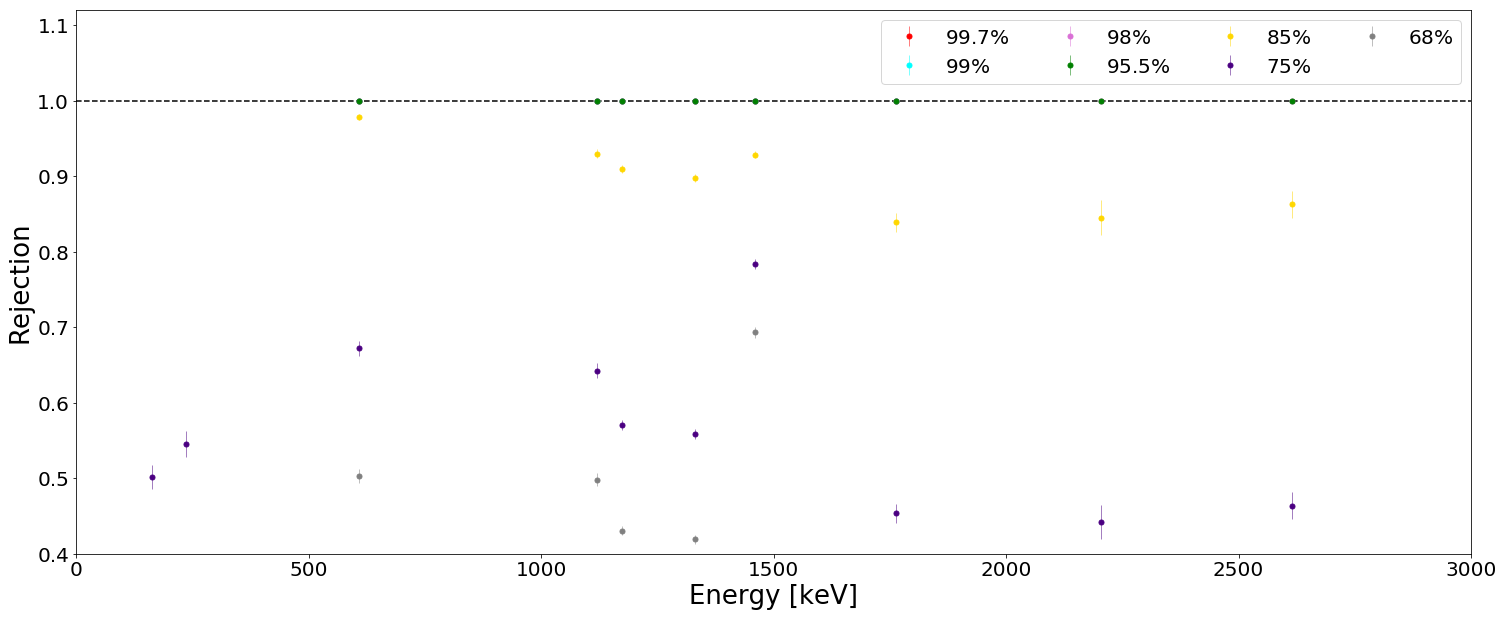

In [52]:
plt.figure(figsize=(25,10))

plt.errorbar(x_1, Acce_E_1, Sig_E_1, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='red', label='$99.7\%$')
plt.errorbar(x_7, Acce_E_7, Sig_E_7, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='cyan', label='$99\%$')
plt.errorbar(x_6, Acce_E_6, Sig_E_6, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='orchid', label='$98\%$')
plt.errorbar(x_2, Acce_E_2, Sig_E_2, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='green', label='$95.5\%$')
plt.errorbar(x_3, Acce_E_3, Sig_E_3, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='gold', label='$85\%$')
plt.errorbar(x_4, Acce_E_4, Sig_E_4, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='indigo', label='$75\%$')
plt.errorbar(x_5, Acce_E_5, Sig_E_5, marker='.', markersize=10, linestyle=" ", linewidth=0.5, color='grey', label='$68\%$')
plt.ylabel('Rejection', fontsize=26)
plt.xlabel('Energy [keV]', fontsize=26)
plt.legend(loc='best', fontsize=20, ncol=4)
plt.hlines(y=1, xmin=0, xmax=3e3, colors='k', linestyles='dashed')
plt.xlim(0,3e3)
plt.ylim(0.40,1.12)
plt.tick_params(labelsize=20)

In [53]:
np.mean(Acce_E_1), np.mean(Acce_E_7), np.mean(Acce_E_6), np.mean(Acce_E_2), np.mean(Acce_E_3), np.mean(Acce_E_4), np.mean(Acce_E_5)

(1.0,
 1.0,
 1.0,
 1.0,
 0.8990314805650897,
 0.5635149095297197,
 0.4189300374948102)

In [54]:
np.sqrt(np.sum(Sig_E_1**2))/len(Sig_E_1), np.sqrt(np.sum(Sig_E_7**2))/len(Sig_E_7), np.sqrt(np.sum(Sig_E_6**2))/len(Sig_E_6), np.sqrt(np.sum(Sig_E_2**2))/len(Sig_E_2), np.sqrt(np.sum(Sig_E_3**2))/len(Sig_E_3), np.sqrt(np.sum(Sig_E_4**2))/len(Sig_E_4), np.sqrt(np.sum(Sig_E_5**2))/len(Sig_E_5)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'